In [ ]:
# Comprehensive data leakage summary report
print("📊 DATA LEAKAGE SUMMARY REPORT")
print("=" * 60)

# Basic stats
total_train = len(train_presplit)
total_validation = len(validation_presplit)
total_articles = total_train + total_validation

print(f"Dataset Overview:")
print(f"  Training articles: {total_train:,}")
print(f"  Validation articles: {total_validation:,}")
print(f"  Total articles: {total_articles:,}")
print(f"  Train/Val split ratio: {total_train / total_validation:.1f}:1")

# ID-based leakage
id_leakage_count = len(overlapping_ids) if "overlapping_ids" in locals() else 0
id_leakage_percent = (
    (id_leakage_count / total_validation) * 100 if total_validation > 0 else 0
)

print(f"\n📋 ArticleId Leakage:")
print(f"  Duplicate ArticleIds: {id_leakage_count}")
print(f"  Leakage rate: {id_leakage_percent:.1f}% of validation set")

# Text-based leakage
text_leakage_count = len(overlapping_hashes) if "overlapping_hashes" in locals() else 0
text_leakage_percent = (
    (text_leakage_count / total_validation) * 100 if total_validation > 0 else 0
)

print(f"\n📝 Text Content Leakage:")
print(f"  Duplicate text content: {text_leakage_count}")
print(f"  Leakage rate: {text_leakage_percent:.1f}% of validation set")

# Overall assessment
total_leakage = max(id_leakage_count, text_leakage_count)
overall_leakage_percent = (
    (total_leakage / total_validation) * 100 if total_validation > 0 else 0
)

print(f"\n🎯 OVERALL ASSESSMENT:")
if total_leakage == 0:
    print("  ✅ NO DATA LEAKAGE DETECTED")
    print("  ✅ Train/validation split is clean")
elif overall_leakage_percent < 5:
    print(
        f"  ⚠️  MINOR LEAKAGE: {total_leakage} articles ({overall_leakage_percent:.1f}%)"
    )
    print("  📝 Consider removing duplicates but may not significantly impact results")
elif overall_leakage_percent < 10:
    print(
        f"  🚨 MODERATE LEAKAGE: {total_leakage} articles ({overall_leakage_percent:.1f}%)"
    )
    print("  ⚠️  Should remove duplicates to ensure valid evaluation")
else:
    print(
        f"  🔥 SEVERE LEAKAGE: {total_leakage} articles ({overall_leakage_percent:.1f}%)"
    )
    print("  🚨 MUST remove duplicates - current evaluation is invalid")

print(f"\nRecommendation:")
if total_leakage == 0:
    print("  Proceed with current train/validation split")
else:
    print(f"  Remove {total_leakage} duplicate articles from validation set")
    print(
        f"  Clean validation set would have {total_validation - total_leakage} articles"
    )

In [ ]:
# Check for duplicate text content (same articles with different IDs)
import hashlib


def get_text_hash(text):
    """Create hash of normalized text for comparison."""
    # Normalize text: lowercase, strip whitespace, remove extra spaces
    normalized = " ".join(str(text).lower().strip().split())
    return hashlib.md5(normalized.encode()).hexdigest()


# Create text hashes for both datasets
train_presplit["text_hash"] = train_presplit["Text"].apply(get_text_hash)
validation_presplit["text_hash"] = validation_presplit["Text"].apply(get_text_hash)

# Find overlapping text hashes
train_hashes = set(train_presplit["text_hash"])
validation_hashes = set(validation_presplit["text_hash"])
overlapping_hashes = train_hashes.intersection(validation_hashes)

print("🚨 DATA LEAKAGE ANALYSIS - TEXT CONTENT")
print("=" * 50)
print(f"Training set unique texts: {len(train_hashes)}")
print(f"Validation set unique texts: {len(validation_hashes)}")
print(f"Overlapping text hashes: {len(overlapping_hashes)}")

if overlapping_hashes:
    print(f"\n⚠️  CRITICAL: {len(overlapping_hashes)} duplicate texts found!")

    # Show examples of duplicate texts
    duplicate_examples = validation_presplit[
        validation_presplit["text_hash"].isin(overlapping_hashes)
    ]
    print(f"\nExample duplicate articles:")
    for i, row in duplicate_examples.head(3).iterrows():
        matching_train = train_presplit[train_presplit["text_hash"] == row["text_hash"]]
        print(
            f"  Validation ID {row['ArticleId']} matches Training ID {matching_train.iloc[0]['ArticleId']}"
        )
        print(f"  Text preview: {row['Text'][:100]}...")
        print()
else:
    print("\n✅ No duplicate text content found")

# Calculate text leakage percentage
text_leakage_percent = (len(overlapping_hashes) / len(validation_hashes)) * 100
print(f"Text leakage percentage: {text_leakage_percent:.1f}% of validation set")

In [ ]:
# Check for duplicate ArticleIds between train and validation sets
train_ids = set(train_presplit["ArticleId"])
validation_ids = set(validation_presplit["ArticleId"])

# Find overlapping IDs
overlapping_ids = train_ids.intersection(validation_ids)

print("🚨 DATA LEAKAGE ANALYSIS - ARTICLE IDs")
print("=" * 50)
print(f"Training set ArticleIds: {len(train_ids)}")
print(f"Validation set ArticleIds: {len(validation_ids)}")
print(f"Overlapping ArticleIds: {len(overlapping_ids)}")

if overlapping_ids:
    print(f"\n⚠️  CRITICAL: {len(overlapping_ids)} duplicate ArticleIds found!")
    print("Sample overlapping IDs:", list(overlapping_ids)[:10])
else:
    print("\n✅ No duplicate ArticleIds found")

# Calculate leakage percentage
leakage_percent = (len(overlapping_ids) / len(validation_ids)) * 100
print(f"Leakage percentage: {leakage_percent:.1f}% of validation set")

In [ ]:
# Load the presplit train and validation datasets
train_presplit = pd.read_csv("data/train_data.csv")
validation_presplit = pd.read_csv("data/validation_data.csv")

print("Presplit dataset shapes:")
print(f"Training set: {train_presplit.shape}")
print(f"Validation set: {validation_presplit.shape}")

print("\nColumn check:")
print(f"Train columns: {train_presplit.columns.tolist()}")
print(f"Validation columns: {validation_presplit.columns.tolist()}")

# Data Leakage Analysis

Checking for potential data leakage between train_data.csv and validation_data.csv files.

In [1]:
# BBC News Dataset - Exploratory Data Analysis

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set up plotting style
plt.style.use("default")
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Load the datasets
train_df = pd.read_csv(
    "/Users/nitin/per/tests/redis_semantic_router/data/BBC News Train.csv"
)
# test_df = pd.read_csv("data/bbc-news-articles-labeled/BBC News Test.csv")

# print("Dataset shapes:")
# print(f"Training set: {train_df.shape}")
# print(f"Test set: {test_df.shape}")

# print("\nTraining data columns:", train_df.columns.tolist())
# print("Test data columns:", test_df.columns.tolist())

# print("\nFirst few rows of training data:")
# display(train_df.head())

In [5]:
train_df.shape

(1490, 3)

In [9]:
train_df["Text"].unique().shape

(1440,)

In [11]:
0.25 * 1440

360.0

In [3]:
# Data quality checks
print("Missing values in training set:")
print(train_df.isnull().sum())

print("\nMissing values in test set:")
print(test_df.isnull().sum())

print("\nDuplicate rows in training set:", train_df.duplicated().sum())
print("Duplicate rows in test set:", test_df.duplicated().sum())

print("\nUnique categories in training set:")
display(train_df["Category"].value_counts())

Missing values in training set:
ArticleId    0
Text         0
Category     0
dtype: int64

Missing values in test set:
ArticleId    0
Text         0
dtype: int64

Duplicate rows in training set: 0
Duplicate rows in test set: 0

Unique categories in training set:


Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

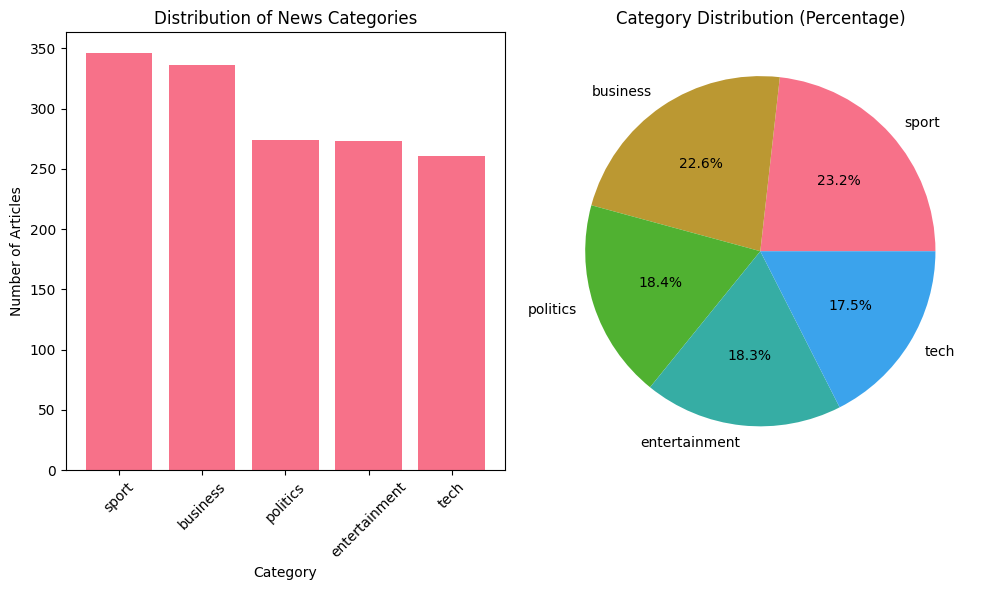

Category balance ratio (min/max): 0.75


In [4]:
# Category distribution visualization
plt.figure(figsize=(10, 6))

# Bar plot
plt.subplot(1, 2, 1)
category_counts = train_df["Category"].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title("Distribution of News Categories")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct="%1.1f%%")
plt.title("Category Distribution (Percentage)")

plt.tight_layout()
plt.show()

print(
    f"Category balance ratio (min/max): {category_counts.min() / category_counts.max():.2f}"
)

In [5]:
# Text length analysis
def analyze_text_length(df, title_prefix=""):
    # Word count
    df["word_count"] = df["Text"].apply(lambda x: len(str(x).split()))

    # Character count
    df["char_count"] = df["Text"].apply(len)

    print(f"{title_prefix} Text Length Statistics:")
    print(
        f"Word count - Mean: {df['word_count'].mean():.1f}, Median: {df['word_count'].median():.1f}"
    )
    print(
        f"Character count - Mean: {df['char_count'].mean():.1f}, Median: {df['char_count'].median():.1f}"
    )
    print(f"Min words: {df['word_count'].min()}, Max words: {df['word_count'].max()}")

    return df


train_df = analyze_text_length(train_df, "Training Set")
test_df = analyze_text_length(test_df, "Test Set")

Training Set Text Length Statistics:
Word count - Mean: 385.0, Median: 337.0
Character count - Mean: 2233.5, Median: 1961.0
Min words: 90, Max words: 3345
Test Set Text Length Statistics:
Word count - Mean: 401.0, Median: 337.0
Character count - Mean: 2322.7, Median: 1979.0
Min words: 126, Max words: 4492


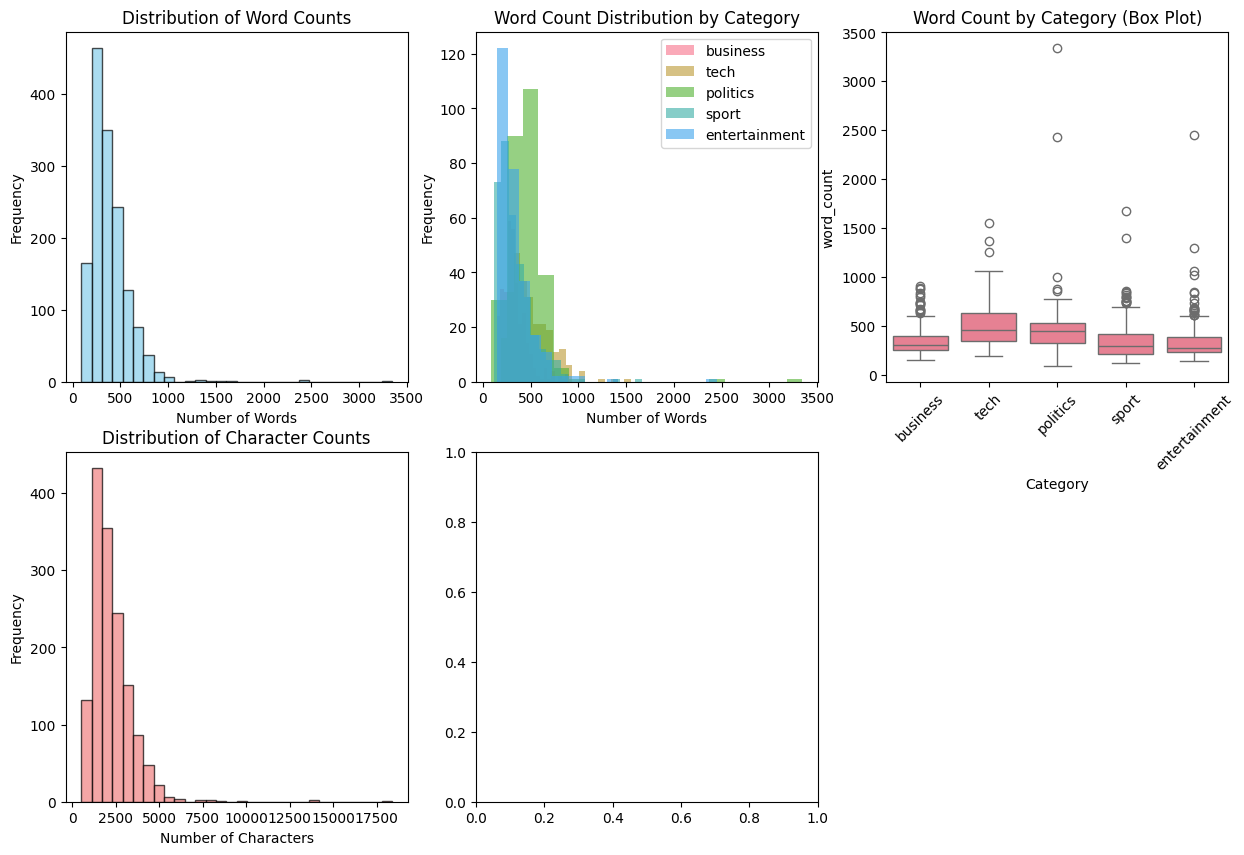

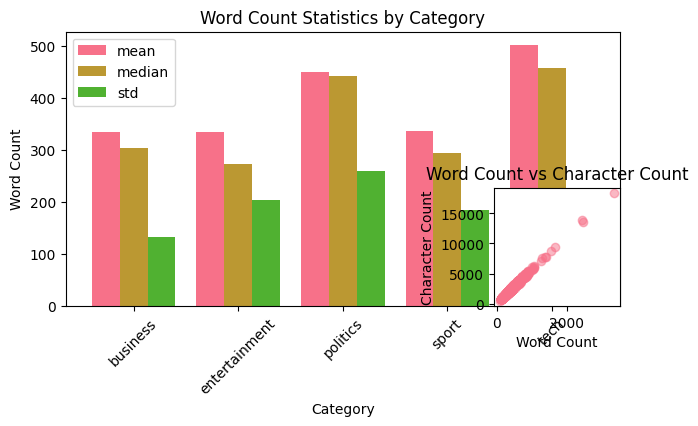

In [6]:
# Text length distribution plots
plt.figure(figsize=(15, 10))

# Overall word count distribution
plt.subplot(2, 3, 1)
plt.hist(train_df["word_count"], bins=30, alpha=0.7, color="skyblue", edgecolor="black")
plt.title("Distribution of Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

# Word count by category
plt.subplot(2, 3, 2)
for category in train_df["Category"].unique():
    category_data = train_df[train_df["Category"] == category]["word_count"]
    plt.hist(category_data, bins=20, alpha=0.6, label=category)
plt.title("Word Count Distribution by Category")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()

# Box plot of word counts by category
plt.subplot(2, 3, 3)
sns.boxplot(data=train_df, x="Category", y="word_count")
plt.title("Word Count by Category (Box Plot)")
plt.xticks(rotation=45)

# Character count distribution
plt.subplot(2, 3, 4)
plt.hist(
    train_df["char_count"], bins=30, alpha=0.7, color="lightcoral", edgecolor="black"
)
plt.title("Distribution of Character Counts")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")

# Word count statistics by category
plt.subplot(2, 3, 5)
category_stats = (
    train_df.groupby("Category")["word_count"].agg(["mean", "median", "std"]).round(1)
)
category_stats.plot(kind="bar", width=0.8)
plt.title("Word Count Statistics by Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.xticks(rotation=45)
plt.legend()

# Correlation between word and character count
plt.subplot(2, 3, 6)
plt.scatter(train_df["word_count"], train_df["char_count"], alpha=0.5)
plt.title("Word Count vs Character Count")
plt.xlabel("Word Count")
plt.ylabel("Character Count")

plt.tight_layout()
plt.show()

In [7]:
# Sample articles from each category
print("Sample articles from each category:")
print("=" * 80)

for category in train_df["Category"].unique():
    print(f"\n{category.upper()} SAMPLE:")
    print("-" * 40)

    sample_article = train_df[train_df["Category"] == category].iloc[0]
    article_text = sample_article["Text"]

    # Show first 300 characters
    print(f"Article ID: {sample_article['ArticleId']}")
    print(f"Word count: {sample_article['word_count']}")
    print(f"Preview: {article_text[:300]}...")
    print()

Sample articles from each category:

BUSINESS SAMPLE:
----------------------------------------
Article ID: 1833
Word count: 301
Preview: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at th...


TECH SAMPLE:
----------------------------------------
Article ID: 1976
Word count: 634
Preview: lifestyle  governs mobile choice  faster  better or funkier hardware alone is not going to help phone firms sell more handsets  research suggests.  instead  phone firms keen to get more out of their customers should not just be pushing the technology for its own sake. consumers are far more interest...


POLITICS SAMPLE:
----------------------------------------
Article ID: 1582
Word count: 290
Preview: howard  truanted to play snooker  conservative leader m

In [8]:
# Final summary statistics
print("DATASET SUMMARY")
print("=" * 50)

print(f"Total training articles: {len(train_df)}")
print(f"Total test articles: {len(test_df)}")
print(f"Number of categories: {len(train_df['Category'].unique())}")
print(f"Categories: {', '.join(train_df['Category'].unique())}")

print("\nText characteristics:")
print(f"Average article length: {train_df['word_count'].mean():.1f} words")
print(f"Shortest article: {train_df['word_count'].min()} words")
print(f"Longest article: {train_df['word_count'].max()} words")

print("\nCategory balance:")
category_counts = train_df["Category"].value_counts()
print(f"Most frequent: {category_counts.index[0]} ({category_counts.iloc[0]} articles)")
print(
    f"Least frequent: {category_counts.index[-1]} ({category_counts.iloc[-1]} articles)"
)
print(f"Balance ratio: {category_counts.min() / category_counts.max():.2f}")

print("\nData quality:")
print(f"Missing values: {train_df.isnull().sum().sum()}")
print(f"Duplicate rows: {train_df.duplicated().sum()}")

print("\nDataset appears ready for text classification tasks!")

DATASET SUMMARY
Total training articles: 1490
Total test articles: 735
Number of categories: 5
Categories: business, tech, politics, sport, entertainment

Text characteristics:
Average article length: 385.0 words
Shortest article: 90 words
Longest article: 3345 words

Category balance:
Most frequent: sport (346 articles)
Least frequent: tech (261 articles)
Balance ratio: 0.75

Data quality:
Missing values: 0
Duplicate rows: 0

Dataset appears ready for text classification tasks!


In [9]:
print("Dataset shapes:")
print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")

print("\nTraining data columns:", train_df.columns.tolist())
print("Test data columns:", test_df.columns.tolist())

print("\nFirst few rows of training data:")
display(train_df.head())

Dataset shapes:
Training set: (1490, 5)
Test set: (735, 4)

Training data columns: ['ArticleId', 'Text', 'Category', 'word_count', 'char_count']
Test data columns: ['ArticleId', 'Text', 'word_count', 'char_count']

First few rows of training data:


,ArticleId,Text,Category,word_count,char_count
0,1833,worldcom ex-boss launches defence lawyers defe...,business,301,1866
1,154,german business confidence slides german busin...,business,325,2016
2,1101,bbc poll indicates economic gloom citizens in ...,business,514,3104
3,1976,lifestyle governs mobile choice faster bett...,tech,634,3618
4,917,enron bosses in $168m payout eighteen former e...,business,355,2190


In [10]:
train_df["Text"].loc[2]

'bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world economy is worsening.  most respondents also said their national economy was getting worse. but when asked about their own family s financial outlook  a majority in 14 countries said they were positive about the future. almost 23 000 people in 22 countries were questioned for the poll  which was mostly conducted before the asian tsunami disaster. the poll found that a majority or plurality of people in 13 countries believed the economy was going downhill  compared with respondents in nine countries who believed it was improving. those surveyed in three countries were split. in percentage terms  an average of 44% of respondents in each country said the world economy was getting worse  compared to 34% who said it was improving. similarly  48% were pessimistic about their national economy  while 41% were optimistic. and 47% saw their family s economic conditions impr

In [11]:
from redisvl.extensions.router import Route

In [12]:
# Method 1: Hand-crafted representative examples
business_route = Route(
    name="business",
    references=[
        "Company reports quarterly earnings exceed expectations",
        "Stock market indices reach record highs today",
        "Federal Reserve announces interest rate policy changes",
        "Major corporate merger deal worth billions announced",
        "Economic indicators suggest potential recession ahead",
        "Oil prices surge following geopolitical developments",
        "Banking sector faces new regulatory requirements",
        "Startup secures major venture capital investment round",
        "Trade negotiations impact global financial markets",
        "Consumer spending data shows economic recovery signs",
    ],
    metadata={"category": "business", "description": "Business and economic news"},
    distance_threshold=0.7,  # Will optimize this later
)

entertainment_route = Route(
    name="entertainment",
    references=[
        "Hollywood blockbuster breaks opening weekend box office records",
        "Celebrity couple announces surprise engagement at awards show",
        "Music festival announces star-studded lineup for summer season",
        "Television drama series wins multiple Emmy awards",
        "Famous actor signs exclusive multi-million dollar streaming deal",
        "Concert tour sells out arenas across multiple cities",
        "Film premiere attracts A-list celebrities and media attention",
        "Reality TV show creates viral social media moments",
        "Broadway musical receives standing ovations from critics",
        "Streaming platform launches original content with major stars",
    ],
    metadata={
        "category": "entertainment",
        "description": "Entertainment industry (movies, music, lifestyle) news",
    },
    distance_threshold=0.7,
)

politics_route = Route(
    name="politics",
    references=[
        "Election results show unexpected voter turnout patterns",
        "Government passes controversial legislation after heated debate",
        "Political candidate officially launches presidential campaign tour",
        "Senate committee launches investigation into executive branch actions",
        "Supreme Court ruling significantly impacts constitutional rights",
        "International diplomatic relations become increasingly strained",
        "Local mayor announces ambitious infrastructure development plans",
        "Congressional hearing addresses pressing national security concerns",
        "Voter registration drives target young adult demographics",
        "Political party convention nominates candidate for major office",
    ],
    metadata={"category": "politics", "description": "Political and government news"},
    distance_threshold=0.7,
)

sport_route = Route(
    name="sport",
    references=[
        "Championship game extends into dramatic overtime thriller",
        "Professional athlete breaks long-standing world record",
        "Team management signs star player to record-breaking contract",
        "Head coach terminated following disappointing season performance",
        "Olympic preparations intensify as games approach quickly",
        "Key player injury sidelines team for remaining season",
        "Tournament bracket announcement creates excitement among fans",
        "Rookie sensation takes professional league by storm",
        "Stadium renovation project completed ahead of schedule",
        "Doping scandal investigation rocks professional cycling community",
    ],
    metadata={"category": "sport", "description": "Sports and athletics news"},
    distance_threshold=0.7,
)

tech_route = Route(
    name="tech",
    references=[
        "Artificial intelligence breakthrough transforms entire industry landscape",
        "Smartphone manufacturer unveils latest flagship device features",
        "Major cybersecurity breach affects millions of user accounts",
        "Social media platform introduces innovative new user features",
        "Cloud computing services expand global infrastructure significantly",
        "Autonomous vehicle testing reaches important safety milestone",
        "Cryptocurrency market experiences dramatic price volatility",
        "Software update patches critical security vulnerabilities immediately",
        "Technology conference showcases promising startup innovations",
        "Quantum computing research team achieves significant breakthrough",
    ],
    metadata={"category": "tech", "description": "Technology and innovation news"},
    distance_threshold=0.7,
)

In [13]:
import os

from redisvl.extensions.router import SemanticRouter

os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Initialize the SemanticRouter
ecom_router = SemanticRouter(
    name="ecom-router",
    routes=[
        tech_route,
        politics_route,
        sport_route,
        entertainment_route,
        business_route,
    ],
    redis_url="redis://localhost:6379",
    overwrite=True,  # Blow away any other routing index with this name
)

00:04:59 sentence_transformers.SentenceTransformer INFO   Use pytorch device_name: mps
00:04:59 sentence_transformers.SentenceTransformer INFO   Load pretrained SentenceTransformer: sentence-transformers/all-mpnet-base-v2
00:05:01 redisvl.index.index INFO   Index already exists, overwriting.


In [14]:
!rvl index info -i ecom-router



Index Information:
╭─────────────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────╮
│ Index Name      │ Storage Type    │ Prefixes        │ Index Options   │ Indexing        │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
| ecom-router     | HASH            | ['ecom-router'] | []              | 0               |
╰─────────────────┴─────────────────┴─────────────────┴─────────────────┴─────────────────╯
Index Fields:
╭─────────────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────╮
│ Name            │ Attribute       │ Type            │ Field Option    │ Option Value    │ Field Option    │ Option Value    │ Field Option    │ Option Value    │ Field Option    │ Option Value    │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼──────────────

In [15]:
train_df.loc[2]

ArticleId                                                  1101
Text          bbc poll indicates economic gloom citizens in ...
Category                                               business
word_count                                                  514
char_count                                                 3104
Name: 2, dtype: object

In [16]:
route_match = ecom_router(train_df.loc[2]["Text"])

In [17]:
route_match

RouteMatch(name='business', distance=0.603073894978)

In [18]:
val_df = train_df.sample(frac=0.25)
train_df = train_df[~train_df.index.isin(val_df.index)]

In [19]:
val_df.shape, train_df.shape

((372, 5), (1118, 5))

In [20]:
val_df["Category"].value_counts()

Category
business         87
sport            87
tech             79
entertainment    63
politics         56
Name: count, dtype: int64

In [29]:
# test_data = [
#             {"query": "hello", "query_match": "greeting"},
#             {"query": "goodbye", "query_match": "farewell"},
#             ...
#         ]
train_data = []

for row in train_df.itertuples():
    train_data.append({"query": row.Text, "query_match": row.Category})

In [33]:
import time

from redis_retrieval_optimizer.threshold_optimization import RouterThresholdOptimizer

start_time = time.time()
optimizer = RouterThresholdOptimizer(ecom_router, train_data)
optimizer.optimize()

Eval metric F1: start 0.383, end 0.494 
Ending thresholds: {'tech': 1.1373737373737383, 'politics': 0.2545454545454544, 'sport': 0.6666666666666667, 'entertainment': 1.4222222222222225, 'business': 0.9333333333333338}


In [34]:
end_time = time.time()

In [35]:
end_time - start_time

1271.6317241191864